In [1]:
from scipy.stats import uniform 
from scipy.stats import expon
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import scipy.stats as stats

### Inverse Sampling 

In [14]:
#Inverse sampling when inverse CDF is known
def inverse_sample_exp(num,mean):
    #Sample
    x = uniform.rvs(size=num)
    s = -mean*np.log(1-x)
    #Actual
    a = expon.rvs(size=num,scale=mean)
    
    #Visualization
    plt.figure(figsize=(12,9))
    plt.hist(s, bins=50, alpha=0.5, label="Generated r.v.")
    plt.hist(a, bins=50, alpha=0.5, label="Actual r.v.")
    plt.title("Sampling vs Actual Exponential Distribution %i points" %num)
    plt.legend()
    plt.show()
    return s

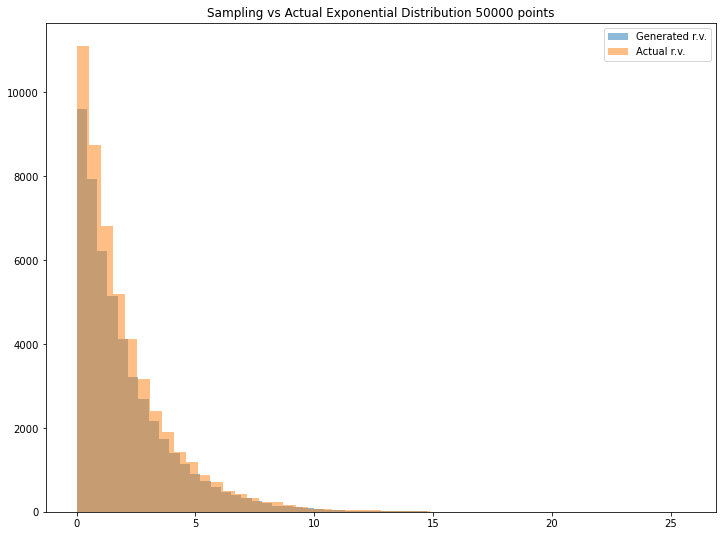

array([0.63494627, 3.78141361, 0.11784704, ..., 2.85155351, 0.25677762,
       2.73791957])

In [15]:
inverse_sample_exp(50000,2)

### Dartboard Sampling

In [5]:
#Generate one point; Hit or miss by distance
def dartboard_one_point(r):
    circle_r = r/2
    x = uniform.rvs(loc = -circle_r, scale = r, size = 1)
    y = uniform.rvs(loc = -circle_r, scale = r, size = 1)
    dist = np.sqrt(x*x + y*y)
    if dist <= r/2:
        return [(x,y),1]
    else:
        return [(x,y),0]
    

In [6]:
dartboard_one_point(7)

[(array([-2.56565444]), array([-2.56593301])), 0]

In [16]:
#Dartboard sampling to approximate pi
def dartboard_sample(num,radius):
    points = []
    hit_x = []
    hit_y = []
    miss_x = []
    miss_y = []
    for i in range(num):
        p = dartboard_one_point(radius)
        points.append(p[1])
        if p[1] == 1:
            hit_x.append(p[0][0][0])
            hit_y.append(p[0][1][0])
        else:
            miss_x.append(p[0][0][0])
            miss_y.append(p[0][1][0])
            
    #Visualization
    plt.figure(figsize=(9,9))
    plt.plot(hit_x, hit_y, 'o', color='black', markersize = 3, label = 'hit');
    plt.plot(miss_x, miss_y, 'o', color='gray', markersize = 3, markerfacecolor = 'white', label = 'miss');
    plt.title("Dartboard Sampling %i points" %num)
    plt.legend(loc = 'upper left')
    plt.show()
    return points

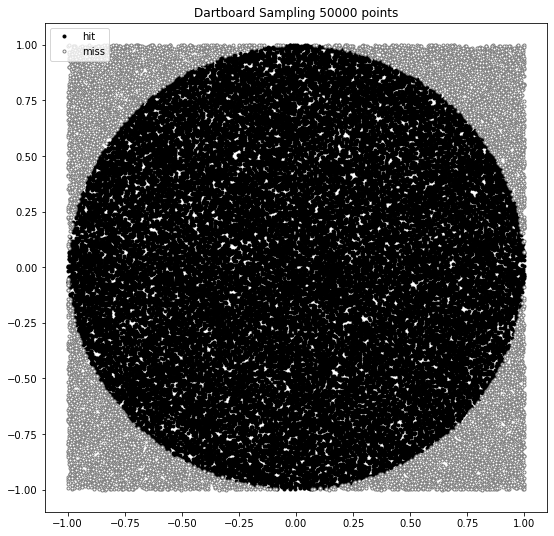

In [17]:
hit_miss = dartboard_sample(50000,2)

In [9]:
sum(hit_miss)/len(hit_miss)*4

3.13872

### Rejection Sampling

In [10]:
#Sampling one point and decide accept or reject
def rejection_one_point(mean,variance):
    c = 1/np.sqrt(variance*2*math.pi) #constant = max of the normal distribution
    sd = np.sqrt(variance)
    x = uniform.rvs(loc = mean - 3*sd, scale = 6*sd, size = 1)
    y = uniform.rvs(loc = 0, scale = c, size = 1)
    p = 1/np.sqrt(variance*2*math.pi)* math.exp(-0.5*math.pow((x-mean),2)/variance)
    
    if p >= y:
        return [(x,y),1]
    else:
        return [(x,y),0]
        

In [11]:
rejection_one_point(0,1)

[(array([1.19482625]), array([0.08955386])), 1]

In [12]:
#Rejection sampling (monte carlo integration) for normal distribution
def rejection_sample(m,v,num):
    hit_x = []
    hit_y = []
    miss_x = []
    miss_y = []
    sd = np.sqrt(v)
    for i in range(num):
        cur_point = rejection_one_point(m,v)
        if cur_point[1] == 1:
            hit_x.append(cur_point[0][0][0])
            hit_y.append(cur_point[0][1][0])
            #hit_r.append(cur_point[0][1])
        else:
            miss_x.append(cur_point[0][0][0])
            miss_y.append(cur_point[0][1][0])
            
    s = np.linspace(m - 3*sd, m + 3*sd, 100)

    #Visualization
    plt.figure(figsize=(12,9))
    plt.plot(hit_x, hit_y, 'o', color='black', markersize = 7, label = 'hit');
    plt.plot(miss_x, miss_y, 'o', color='gray', markersize = 7, markerfacecolor = 'white', label = 'miss');
    plt.plot(s, stats.norm.pdf(s, m, v),linewidth = 5, color = 'red', label = 'actual')
    plt.title("Sampling vs Actual Normal Distribution" )
    plt.legend()
    plt.show()
    return [hit_x,hit_y]   

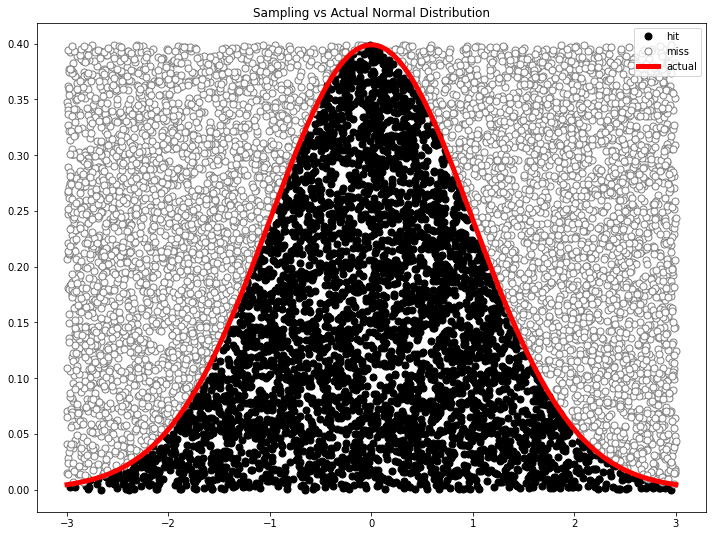

[[-1.0564202006228087,
  -1.07223603758424,
  0.4008474550715144,
  1.037654072030163,
  0.41775554402814485,
  1.569160991401267,
  -0.3914315344603492,
  0.35630831747554303,
  0.5515798190877006,
  2.2094743604445632,
  0.3510148902720607,
  -0.24670107229532734,
  -0.217207383488498,
  -0.41497531529842746,
  -0.4496432438944238,
  -0.20596770623116623,
  0.4231106855372868,
  -1.3886769627249034,
  -1.2138201490920943,
  -0.6606354033163737,
  -1.409514109435791,
  1.8554811201484682,
  0.12639648418463434,
  0.07673704574678908,
  0.06755183419876154,
  -0.9421055721066036,
  -1.4003117928410314,
  1.0835803289663533,
  0.67741424654157,
  0.41321381937306345,
  1.1534818804238824,
  1.9974695375916385,
  -0.7349771842645274,
  0.9413130388675413,
  1.1319786518014432,
  -0.4708338996379773,
  -1.0024405855249623,
  0.22369560430091395,
  -0.316624323869636,
  0.13864245529720698,
  0.28145072174464403,
  1.0696969600458992,
  0.9486607894332391,
  -0.1267546547916898,
  -1.95967

In [13]:
rejection_sample(0,1,10000)